<a href="https://colab.research.google.com/github/KodumuruRaja/IMBalanced-Balanced-data/blob/main/ImbalancedData-IsolationForest-RandomOverSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
LABELS=['Normal',"Fraud"]

In [ ]:
data=pd.read_csv("/content/creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223858 entries, 0 to 223857
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    223858 non-null  float64
 1   V1      223858 non-null  float64
 2   V2      223858 non-null  float64
 3   V3      223858 non-null  float64
 4   V4      223858 non-null  float64
 5   V5      223858 non-null  float64
 6   V6      223858 non-null  float64
 7   V7      223858 non-null  float64
 8   V8      223858 non-null  float64
 9   V9      223858 non-null  float64
 10  V10     223858 non-null  float64
 11  V11     223858 non-null  float64
 12  V12     223858 non-null  float64
 13  V13     223857 non-null  float64
 14  V14     223857 non-null  float64
 15  V15     223857 non-null  float64
 16  V16     223857 non-null  float64
 17  V17     223857 non-null  float64
 18  V18     223857 non-null  float64
 19  V19     223857 non-null  float64
 20  V20     223857 non-null  float64
 21  V21     22

In [ ]:
columns=data.columns.tolist()
columns=[c for c in columns if c not in ["Class"]]
target="Class"
state=np.random.RandomState(42)
x=data[columns]
y=data[target]
print(x.shape)
print(y.shape)

(223858, 30)
(223858,)


In [ ]:
x.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
y.dropna(inplace=True)

## EDA

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

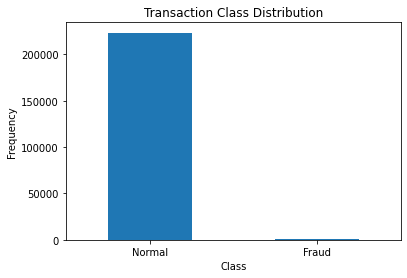

In [ ]:
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]

In [ ]:
print(fraud.shape,normal.shape)

(415, 31) (223442, 31)


# OverSampling

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smk=SMOTETomek(random_state=42)


In [ ]:
x_res,y_res=smk.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_res.shape,y_res.shape

((445852, 30), (445852,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0.0: 223442, 1.0: 415})
Resampled dataset shape Counter({0.0: 222926, 1.0: 222926})


# **RANDOM OVER SAMPLING**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os=RandomOverSampler(ratio=0.5)

In [ ]:
x_train_res,y_train_res=os.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train_res.shape,y_train_res.shape

((335163, 30), (335163,))

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0.0: 223442, 1.0: 415})
Resampled dataset shape Counter({0.0: 223442, 1.0: 111721})


In [ ]:
os_us=SMOTETomek(ratio=0.5)
x_train_res1,y_train_res1=os_us.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train_res1.shape,y_train_res1.shape

((333685, 30), (333685,))

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

Original dataset shape Counter({0.0: 223442, 1.0: 415})
Resampled dataset shape Counter({0.0: 222703, 1.0: 110982})
